<a href="https://colab.research.google.com/github/Sapphirevic/Classifications/blob/main/KNN_and_Naive_Bayes_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

K-nearest neighbours (KNN) is a simple, instance-based learning algorithm in which an observation's classification is determined by the majority vote of its neighbours. In this exercise, we will explore the KNN model's sensitivity to the choice of the number of neighbours (K) and the type of distance metric used.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

## Load and prepare the dataset

In [2]:
# Load the dataset
X, y = load_breast_cancer(return_X_y=True)

We then split the data to prepare the training and testing datasets.

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
k_values = [1, 3, 5, 7, 9]

# Train and evaluate models for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy for k={k}: {accuracy:.6f}")

Accuracy for k=1: 0.929825
Accuracy for k=3: 0.929825
Accuracy for k=5: 0.956140
Accuracy for k=7: 0.956140
Accuracy for k=9: 0.956140


In [7]:
optimal_k = 5
# Distance metrics to experiment with
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Train and evaluate models for each distance metric
for i in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=i)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy for metric = {i}: {accuracy:.8f}")

Accuracy for metric = euclidean: 0.95614035
Accuracy for metric = manhattan: 0.94736842
Accuracy for metric = chebyshev: 0.95614035


In [11]:
def plot_decision_boundary(X, y, k, i):
    # Train a KNN model using the specified number of neighbours and distance metric
    knn = KNeighborsClassifier(n_neighbors=k, metric=i)
    knn.fit(X[:, :2], y)  # Use only two features for simplicity

    # Create a mesh grid based on feature ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict class for each point on the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contours
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')  # Plot the training points
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"Decision Boundary for K={k} with {i} metric")
    plt.show()

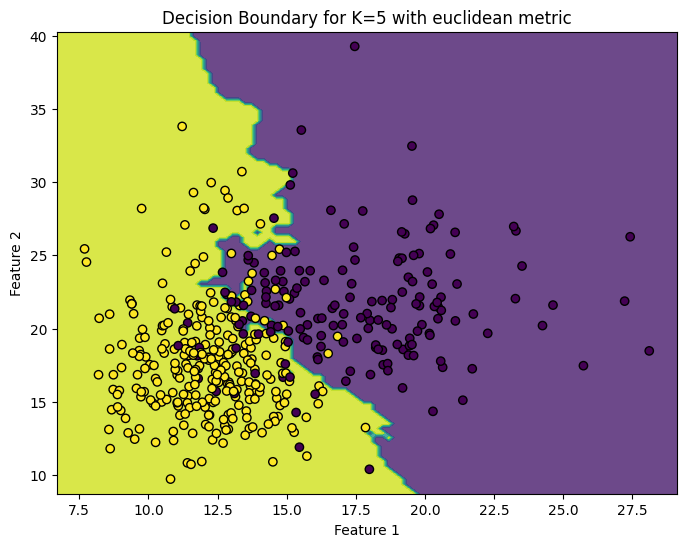

In [12]:
plot_decision_boundary(X_train, y_train, k=5, i='euclidean')